### Week 4 lab

* #### Aims 
    - Practice maximum likelihood with olympic data
    - Practice expectation and numerical approximation 

* #### Tasks
    - Write your own functions to compute maximum likelihood estimates of $w$ and $\sigma^2$
    - Test optimal log-joint likelihood against different polynomial orders
    - Compare empirical and exact expectation


#### Task 1:  Load olympic data and rescale

In [4]:
import numpy as np
import pylab as plt
%matplotlib inline

data = np.loadtxt('olympic100m.txt',delimiter=',')
x = data[:,0][:,None] # again, make x a column vector
t = data[:,1][:,None] # again, make t a column vector
x = (x - x.mean())/x.std() # rescale x 

FileNotFoundError: olympic100m.txt not found.

#### Task 2: Write your function for the log of Gaussian PDF and construct polynomial design matrix

$$ \log \mathcal{N}(x; \mu, \sigma^2) = \log\left(\frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(x - \mu)^2\right)\right) = - \frac{1}{2} \log (2\pi) - \frac{1}{2} \log(\sigma^2) - \frac{1}{2 \sigma^2} (x-\mu)^2 $$

In [7]:
def loggausspdf(x,mu,sigma2): # your own function to compute log of gaussian pdf 
    const = -0.5*np.log(2.0*np.pi) - 0.5*np.log(sigma2)
    return const - (1.0/(2*sigma2))*(x-mu)**2

def polynomial(x, max_order): # your own function to construct polynomial design matrix
    X = np.ones_like(x)
    for i in range(1, max_order+1):
        X = np.hstack((X,x**i))
    return(X)

#### Task 3: Write your function for maximum likelihood estimator for $w$ and $\sigma^2$

$$ \hat{\mathbf{w}}  = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t},~~\hat{\sigma^2} = \frac{1}{N}\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)^T\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)$$

You should be able to re-use code from the previous two lab sheets for both parts.

In [8]:
def max_like_w(X, t): # your own function to compute maximum likelihood estimate of w
    return(np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t)))

def max_like_sigma2(X, t, w): # your own function to compute maximum likelihood estimate of sigma^2
    return(((t-np.dot(X,w))**2).mean())

#### Task 4: Test the joint likelihood against order of polynomials

- log joint likelihood:  $\sum_{n=1}^N \log p(t_n | x_n, w, \sigma^2) = \sum_{n=1}^N \log \mathcal{N} (t_n; \mathbf{x}_n^T \mathbf{w}, \sigma^2)$
- log joint likelihood at $\hat{\mathbf{w}}$ and $\hat{\sigma^2}$: $\sum_{n=1}^N \log \mathcal{N}(t_n; \mathbf{x}_n^T \hat{\mathbf{w}}, \hat{\sigma^2})$

Text(0,0.5,'Likelihood on training data')

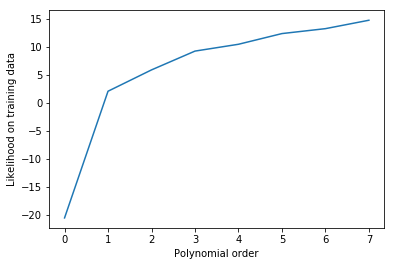

In [6]:
max_order = 7 # maximum order 
L = np.zeros((max_order+1,1)) # preallocate log joint likelihoods
for i in np.arange(max_order+1): # for loop over all polynomial order
    X = polynomial(x, i) # construct polynomial design matrix
    w_ml = max_like_w(X,t) # compute maximum likelihood estimate of w
    sigma2_ml = max_like_sigma2(X,t, w_ml) # compute maximum likelihood estimate of sigma^2
    L[i] = loggausspdf(t,np.dot(X,w_ml),sigma2_ml).sum() # compute the log-joint likelihood 
                                                         # at the maximum likelihood estimates
plt.plot(np.arange(max_order+1),L) # plot L vs polynomial orders
plt.xlabel('Polynomial order')
plt.ylabel('Likelihood on training data')

<p>It can be seen from the plot that the likelihood increases as the polynomial order increases.</p>

#### Task 5 (more challenging!): Finally not-the-olympics

*Since this task is very open-ended, we do not provide a model solution*

#### Task 6.1: Sample-based approximations to expectations
This question is intended to build your intuition for numerical approximations to expectations, which are what we often must compute in practice (as for anything other than Gaussians, the integral is usually not analytically tractable).
We will try and compute the expected value of $y^2$ where $y\sim U(0,1)$, i.e.
$$ E_{p(y)}(y^2) \approx \frac{1}{N} \sum^N_{n=1} y_n^2, y_n \sim U(0,1) $$
Analytically, we can compute the value as:
$$ E_{p(y)}(y^2) = \int_{0}^1 y^2 p(y) ~dy = \int_{0}^1 y^2~dy = \left[\frac{1}{3}y^3 \right]_0^1 = \frac{1}{3} $$
To compute a sample based approximation, we will draw samples from $U(0,1)$, square them, and compute the average.

In [18]:
np.random.seed(1)
N = 10000 # maximum number of samples
u = np.random.rand(N,1)**2 # generate random numbers from uniform distribution (0,1)
expected_val = np.zeros((N-1,1)) # preallocate empirical approximation with different N
for i in np.arange(N-1): # for loop over different number of samples
    expected_val[i] = u[0:i+1].mean() # compute empirical approximation to the expectation

#### Task 6.2: Plot empirical approximation aganist number of samples

Text(0, 0.5, 'Expected value of $y^2$')

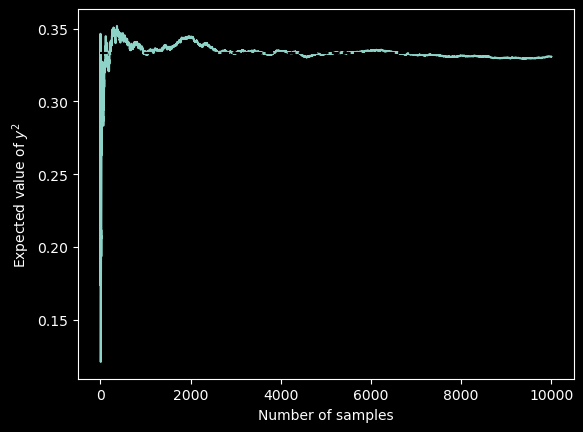

In [17]:
plt.plot(np.arange(N-1),expected_val)
plt.plot([0,N-1],[1.0/3.0,1.0/3.0],'k--')
plt.xlabel('Number of samples')
plt.ylabel('Expected value of $y^2$')

#### Task 6.3 (optional): Approximate by weighting uniformly-spaced values, instead of samples

An alternative formulation for the expectation is that instead of sampling from the distribution and taking an average, we take many equally-spaced values of $y$ from the range of interest (e.g. with `np.linspace`), and compute an average weighted by $p(y)$, i.e.
$$ E_{p(y)}(y^2) \approx \sum^N_{n=1} \frac{1}{n} \, p(y_n) \, y_n^2 $$
where $y_n = n/N$ for $n = 0 \ldots N$. Here we are approximating the integral that defines the true expectation using the rectangle rule or Riemann sum; the $1/n$ factor is the width of rectangles subdividing the range of $y$.

Implement this approach, and compare your results with before. Do you expect any significant difference? Why?

/tmp/ipykernel_3237714/4096391280.py:7: RuntimeWarning: invalid value encountered in divide
  expected_val[i] = (ysq * py * 1/i).sum() # compute empirical approximation to the expectation


Text(0, 0.5, 'Expected value of $y^2$')

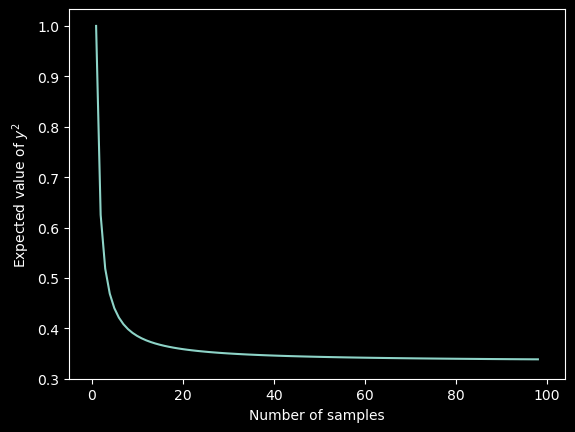

In [36]:
N = 100 # maximum number of samples
expected_val = np.zeros((N-1,1)) # preallocate empirical approximation with different N
for i in np.arange(N-1): # loop over different number of samples
    y = np.linspace(0, 1, i + 1) # generate evenly spaced values in [0,1]
    ysq = y**2
    py = 1.0  # uniform density is very boring
    expected_val[i] = (ysq * py * 1/i).sum() # compute empirical approximation to the expectation

plt.plot(np.arange(N-1),expected_val)
plt.plot([0,N-1],[1.0/3.0,1.0/3.0],'k--')
plt.xlabel('Number of samples')
plt.ylabel('Expected value of $y^2$')

#### Task 6.4 (optional): Expectation using a Laplace distribution

Instead of a uniform distribution on $[0,\,1]$, use a Laplace distribution with mean 0.5 and scale 0.1. The Laplace distribution is similar to Gaussian, but with absolute value under the exponential instead of square -- you can check the definition of its density online if not familiar with it. Implement the second approach above for this distribution. Try both the above approaches (you'll need to research how to sample from the Laplace distribution). Consider carefully the range of values $y_n$ to include.

Do the two approaches differ in this case? How do the scale of the distribution, and the range of $y_n$, affect the accuracy of each estimate?

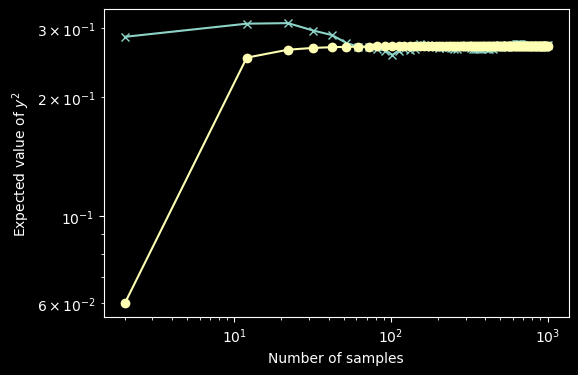

In [44]:
# Laplace distribution parameters and PDF
mu = 0.5       # mean
b = 0.1        # scale parameter
def laplace_pdf(x, mu=mu, b=b):
    return (1.0 / (2.0 * b)) * np.exp(-np.abs(x - mu) / b)

# Sampling approximation
def sampling_expected_y2(N_points):
    np.random.seed(0)
    samples = np.random.laplace(loc=mu, scale=b, size=N_points)
    return np.mean(samples**2)

# Riemann (linspace) approximation (using midpoint rule, slightly more accurate)
def riemann_midpoint_expected_y2(N_points):
    L = 8  # covers about mu ± 8b, so catches almost the whole distribution
    xmin, xmax = mu - L * b, mu + L * b
    delta = (xmax - xmin) / N_points
    midpoints = xmin + (np.arange(N_points) + 0.5) * delta
    pdf_vals = laplace_pdf(midpoints)
    integral_approx = np.sum(pdf_vals * (midpoints**2)) * delta
    return integral_approx

N_vals = np.linspace(2, 1000, 100, dtype=int)
mc_ests = []
rie_ests = []
for N in N_vals:
    mc_ests.append(sampling_expected_y2(N))
    rie_ests.append(riemann_midpoint_expected_y2(N))

plt.figure(figsize=(6,4))
plt.loglog(N_vals, mc_ests, marker='x')
plt.loglog(N_vals, rie_ests, marker='o')
plt.xlabel('Number of samples')
plt.ylabel('Expected value of $y^2$')
plt.show()